# Kyla Friso

## Tentative Research Question

I will answer the question, **"Are shorter or longer films more popular?"** In terms of the dataset, I will be analyzing whether there is any significant correlation between the runtimes and the rankings or sales (domestic, international, and global) of the included films. I will also look into whether runtimes correlate with the genres or distributors of the films, in case these are acting as confounding variables. Before running any analysis, I will ensure that runtimnes are available for all or the majority of the films, and I will manually add data based on my own research where necessary. Once these statistical analyses are complete, I will begin analyzing my results to build hypotheses to explain the patterns or lack there of observed. I plan on looking into studies on human attention span to see if psychological findings support my own results.

In [ ]:
# Load Dataset
import pandas as pd
df = pd.read_csv("../data/raw/Highest Holywood Grossing Movies.csv")
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


## Exploratory Data Analysis

In [6]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

### Sales Data 

In [ ]:
# Preliminary Analysis
print(df.shape, end='\n\n')
print(df.columns, end='\n\n')
print(df.nunique(axis=0), end='\n\n')
print(df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))

(918, 11)

Index(['Unnamed: 0', 'Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

Unnamed: 0                    918
Title                         918
Movie Info                    918
Distributor                    34
Release Date                  740
Domestic Sales (in $)         918
International Sales (in $)    913
World Sales (in $)            918
Genre                         309
Movie Runtime                 101
License                         4
dtype: int64

       Unnamed: 0 Domestic Sales (in $) International Sales (in $)  \
count  918.000000            918.000000                 918.000000   
mean   458.500000      167746917.938998           230143435.584967   
std    265.148072      104036044.969543           217601104.216553   
min      0.000000       80360843.000000                 260.000000   
25%    229.250000      1

###### Notes: There are only 101 unique 'Movie Runtime' values found for the 918 films described. The 'Movie Runtime' variable is not a numerical value, as its absence in the results for the 'describe()' function demonstrates. This will need to be adjusted.

In [ ]:
# Checking for Null Values in Relevant Columns
print(df['Movie Runtime'].isnull().values.any())
print(df['Domestic Sales (in $)'].isnull().values.any())
print(df['International Sales (in $)'].isnull().values.any())
print(df['World Sales (in $)'].isnull().values.any())

False
False
False
False


###### Notes: No null values were found in any of the relevant columns. Therefore, there is no need to remove any rows.

In [ ]:
# Converting 'Movie Runtime' from Non-Numerical to Numerical
import re
df['Hours'] = df['Movie Runtime'].str.extract('(\d+)\shr\s\d+\smin', expand=True)
df['Minutes'] = df['Movie Runtime'].str.extract('\d+\shr\s(\d+)\smin', expand=True)
df['Hours'] = pd.to_numeric(df['Hours'])
df['Minutes'] = pd.to_numeric(df['Minutes'])
df['Runtime (Min)'] = (60 * df['Hours']) + df['Minutes']
df.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Hours,Minutes,Runtime (Min)
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13,2.0,18.0,138.0
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13,3.0,1.0,181.0
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13,2.0,42.0,162.0
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN,2.0,14.0,134.0
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN,2.0,29.0,149.0


###### Notes: Runtime has been converted from a string in the format '_ hr _ min' into a numerical variable describing total minutes.

In [ ]:
# Removing Nonessential Columns
df_cleaned = df.drop(columns=['Unnamed: 0', 'Movie Info', 'Release Date','Movie Runtime', 'License', 'Hours', 'Minutes'])
df_cleaned.head()

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Runtime (Min)
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",138.0
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181.0
2,Avatar (2009),Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162.0
3,Black Panther (2018),Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",134.0
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",149.0


### Ratings Data

In [ ]:
# Loading 'Movie Aggregate Rating Data' Dataset
rank = pd.read_csv("../data/processed/Movie Aggregate Rating Data.csv")
rank.head()

,Title,Imdb,RT(Audience),RT(Critic),Letterboxd,Rateyourmusic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Star Wars: Episode VII - The Force Awakens (2015),7.8 (936432),85 (100000+),93 (450),3.41 (802884),3.03 (7496),NaN,Mean of RYM ratings,Mean of Imdb Ratings,Mean of,NaN,NaN,NaN
1,Avengers: Endgame (2019),8.4 (1143197),90 (50000+),94 (555),3.92 (1131629),3.25 (5091),NaN,2.728833747,7.16,NaN,NaN,NaN,NaN
2,Avatar (2009),7.9 (1315981),82 (250000+),82 (335),3.53 (814160),2.71 (7624),NaN,Converted to base 10,NaN,NaN,NaN,NaN,NaN
3,Black Panther (2018),7.3 (781423),79 (50000+),96 (530),3.74 (1112607),2.97 (4535),NaN,5.457667494,NaN,NaN,NaN,NaN,NaN
4,Avengers: Infinity War (2018),8.4 (1091599),92 (50000+),85 (489),4.00 (1180128),3.43 (5540),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Preliminary Analysis
print(rank.shape, end='\n\n')
print(rank.columns, end='\n\n')
print(rank.nunique(axis=0), end='\n\n')
print(rank.describe().apply(lambda s: s.apply(lambda x: format(x, 'f'))))

(918, 13)

Index(['Title', 'Imdb', 'RT(Audience)', 'RT(Critic)', 'Letterboxd',
       'Rateyourmusic', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')

Title            918
Imdb              88
RT(Audience)      24
RT(Critic)        24
Letterboxd        49
Rateyourmusic    238
Unnamed: 6         0
Unnamed: 7         4
Unnamed: 8         2
Unnamed: 9         1
Unnamed: 10        0
Unnamed: 11        0
Unnamed: 12        0
dtype: int64

      Unnamed: 6 Unnamed: 10 Unnamed: 11 Unnamed: 12
count   0.000000    0.000000    0.000000    0.000000
mean         nan         nan         nan         nan
std          nan         nan         nan         nan
min          nan         nan         nan         nan
25%          nan         nan         nan         nan
50%          nan         nan         nan         nan
75%          nan         nan         nan         nan
max          nan         nan         nan         nan


In [ ]:
# Isolating Rankings
rank['Imdb Unstandardized'] = rank['Imdb'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['RT(Audience) Unstandardized'] = rank['RT(Audience)'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['RT(Critic) Unstandardized'] = rank['RT(Critic)'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['Letterboxd Unstandardized'] = rank['Letterboxd'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank['Rateyourmusic Unstandardized'] = rank['Rateyourmusic'].str.extract('(\d+\.*\d*)\s\(\d+\+*\)', expand=True)
rank.head()

,Title,Imdb,RT(Audience),RT(Critic),Letterboxd,Rateyourmusic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Imdb Unstandardized,RT(Audience) Unstandardized,RT(Critic) Unstandardized,Letterboxd Unstandardized,Rateyourmusic Unstandardized
0,Star Wars: Episode VII - The Force Awakens (2015),7.8 (936432),85 (100000+),93 (450),3.41 (802884),3.03 (7496),NaN,Mean of RYM ratings,Mean of Imdb Ratings,Mean of,NaN,NaN,NaN,7.8,85,93,3.41,3.03
1,Avengers: Endgame (2019),8.4 (1143197),90 (50000+),94 (555),3.92 (1131629),3.25 (5091),NaN,2.728833747,7.16,NaN,NaN,NaN,NaN,8.4,90,94,3.92,3.25
2,Avatar (2009),7.9 (1315981),82 (250000+),82 (335),3.53 (814160),2.71 (7624),NaN,Converted to base 10,NaN,NaN,NaN,NaN,NaN,7.9,82,82,3.53,2.71
3,Black Panther (2018),7.3 (781423),79 (50000+),96 (530),3.74 (1112607),2.97 (4535),NaN,5.457667494,NaN,NaN,NaN,NaN,NaN,7.3,79,96,3.74,2.97
4,Avengers: Infinity War (2018),8.4 (1091599),92 (50000+),85 (489),4.00 (1180128),3.43 (5540),NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4,92,85,4.00,3.43


###### Notes: Some of the ratings are formated to include the number of contributions to the average rating in parentheses, following the rating. These have been converted to numerical columns containing only the rating.

In [ ]:
# Standardizing Rankings
rank = rank.apply(pd.to_numeric, errors = 'ignore')
rank['Imdb Standardized'] = (rank['Imdb Unstandardized']/10)*100
rank['RT(Audience) Standardized'] = rank['RT(Audience) Unstandardized']
rank['RT(Critic) Standardized'] = rank['RT(Critic) Unstandardized']
rank['Letterboxd Standardized'] = (rank['Letterboxd Unstandardized']/5)*100
rank['Rateyourmusic Standardized'] = (rank['Rateyourmusic Unstandardized']/5)*100
rank.head()

,Title,Imdb,RT(Audience),RT(Critic),Letterboxd,Rateyourmusic,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Imdb Unstandardized,RT(Audience) Unstandardized,RT(Critic) Unstandardized,Letterboxd Unstandardized,Rateyourmusic Unstandardized,Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized
0,Star Wars: Episode VII - The Force Awakens (2015),7.8 (936432),85 (100000+),93 (450),3.41 (802884),3.03 (7496),NaN,Mean of RYM ratings,Mean of Imdb Ratings,Mean of,...,7.8,85.0,93.0,3.41,3.03,78.0,85.0,93.0,68.2,60.6
1,Avengers: Endgame (2019),8.4 (1143197),90 (50000+),94 (555),3.92 (1131629),3.25 (5091),NaN,2.728833747,7.16,NaN,...,8.4,90.0,94.0,3.92,3.25,84.0,90.0,94.0,78.4,65.0
2,Avatar (2009),7.9 (1315981),82 (250000+),82 (335),3.53 (814160),2.71 (7624),NaN,Converted to base 10,NaN,NaN,...,7.9,82.0,82.0,3.53,2.71,79.0,82.0,82.0,70.6,54.2
3,Black Panther (2018),7.3 (781423),79 (50000+),96 (530),3.74 (1112607),2.97 (4535),NaN,5.457667494,NaN,NaN,...,7.3,79.0,96.0,3.74,2.97,73.0,79.0,96.0,74.8,59.4
4,Avengers: Infinity War (2018),8.4 (1091599),92 (50000+),85 (489),4.00 (1180128),3.43 (5540),NaN,NaN,NaN,NaN,...,8.4,92.0,85.0,4.00,3.43,84.0,92.0,85.0,80.0,68.6


###### Notes: Rankings were standardized by dividing the given ranking by the maximum ranking offered by the site's scoring system. This quotient was then multiplied by 100 to give a standardized percentage ranking. The maximum ranking for each site's scoring system are as follows: Imdb - 10, RT - 100, Letterboxd - 5, Rateyourmusic - 5. RT rankings did not require standardization since they are already presented as scores out of 100%.

In [ ]:
# Removing Nonessential Columns
rank = rank.drop(columns=['Imdb', 'RT(Audience)', 'RT(Critic)', 'Letterboxd',
                          'Rateyourmusic', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 
                          'Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12','Imdb Unstandardized', 
                          'RT(Audience) Unstandardized','RT(Critic) Unstandardized',
                          'Letterboxd Unstandardized', 'Rateyourmusic Unstandardized'])

In [ ]:
# Checking for Null Values in Relevant Columns
print(rank['Imdb Standardized'].isnull().values.any())
print(rank['RT(Audience) Standardized'].isnull().values.any())
print(rank['RT(Critic) Standardized'].isnull().values.any())
print(rank['Letterboxd Standardized'].isnull().values.any())
print(rank['Rateyourmusic Standardized'].isnull().values.any())

True
True
True
True
True


In [ ]:
# Removing Rows with Null Values
rank_cleaned = rank.dropna()
rank_cleaned.head()

,Title,Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized
0,Star Wars: Episode VII - The Force Awakens (2015),78.0,85.0,93.0,68.2,60.6
1,Avengers: Endgame (2019),84.0,90.0,94.0,78.4,65.0
2,Avatar (2009),79.0,82.0,82.0,70.6,54.2
3,Black Panther (2018),73.0,79.0,96.0,74.8,59.4
4,Avengers: Infinity War (2018),84.0,92.0,85.0,80.0,68.6


###### Notes: Currently, the dataset on ratings is uncomplete, and there is a very limited number of rows with all columns filled. Thus, this initial analysis using the current dataset will provide limited insight into correlations between runtime and ratings.

In [ ]:
# Adding Average Rating
rank_cleaned['Average Rating'] = (rank_cleaned['Imdb Standardized'] + rank_cleaned['Letterboxd Standardized'] + rank_cleaned['Rateyourmusic Standardized']
                                  + rank_cleaned['RT(Audience) Standardized'] + rank_cleaned['RT(Critic) Standardized'])/5
rank_cleaned.head()

/var/folders/gh/lskmt33s5hl6qxw5zrrd8d140000gn/T/ipykernel_53113/3192762130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rank_cleaned['Average Rating'] = (rank_cleaned['Imdb Standardized'] + rank_cleaned['Letterboxd Standardized'] + rank_cleaned['Rateyourmusic Standardized']


,Title,Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized,Average Rating
0,Star Wars: Episode VII - The Force Awakens (2015),78.0,85.0,93.0,68.2,60.6,76.96
1,Avengers: Endgame (2019),84.0,90.0,94.0,78.4,65.0,82.28
2,Avatar (2009),79.0,82.0,82.0,70.6,54.2,73.56
3,Black Panther (2018),73.0,79.0,96.0,74.8,59.4,76.44
4,Avengers: Infinity War (2018),84.0,92.0,85.0,80.0,68.6,81.92


### Combined Data

In [ ]:
comb = pd.merge(
    df_cleaned,
    rank_cleaned,
    how="outer",
    on='Title',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
comb.head()

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Runtime (Min),Imdb Standardized,RT(Audience) Standardized,RT(Critic) Standardized,Letterboxd Standardized,Rateyourmusic Standardized,Average Rating
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",138.0,78.0,85.0,93.0,68.2,60.6,76.96
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181.0,84.0,90.0,94.0,78.4,65.0,82.28
2,Avatar (2009),Twentieth Century Fox,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162.0,79.0,82.0,82.0,70.6,54.2,73.56
3,Black Panther (2018),Walt Disney Studios Motion Pictures,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",134.0,73.0,79.0,96.0,74.8,59.4,76.44
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",149.0,84.0,92.0,85.0,80.0,68.6,81.92


### Preliminary Graphs

<Axes: xlabel='Runtime (Min)', ylabel='Domestic Sales (in $)'>

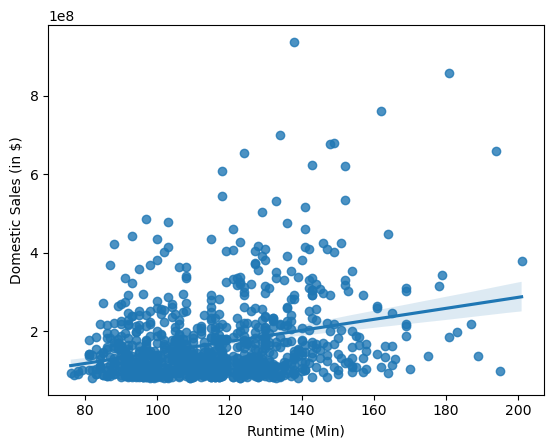

In [ ]:
# Runtime vs. Domestic Sales
sns.regplot(data=comb,
            x='Runtime (Min)',
            y='Domestic Sales (in $)')

###### Notes: A positive correlation is apparent, where domestic sales increase as runtime increases.

<Axes: xlabel='Runtime (Min)', ylabel='International Sales (in $)'>

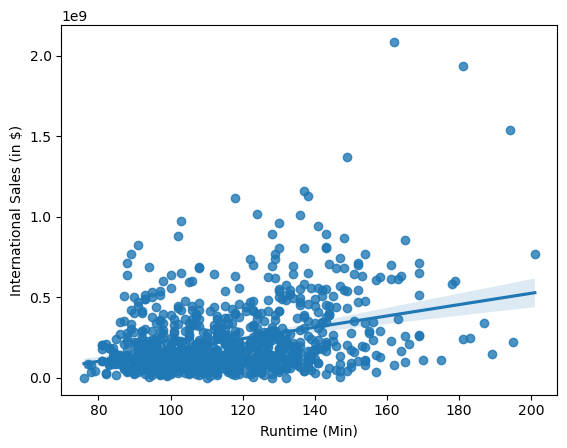

In [ ]:
# Runtime vs. International Sales
sns.regplot(data=comb,
            x='Runtime (Min)',
            y='International Sales (in $)')

###### Notes: A positive correlation is apparent, where international sales increase as runtime increases.

<Axes: xlabel='Runtime (Min)', ylabel='World Sales (in $)'>

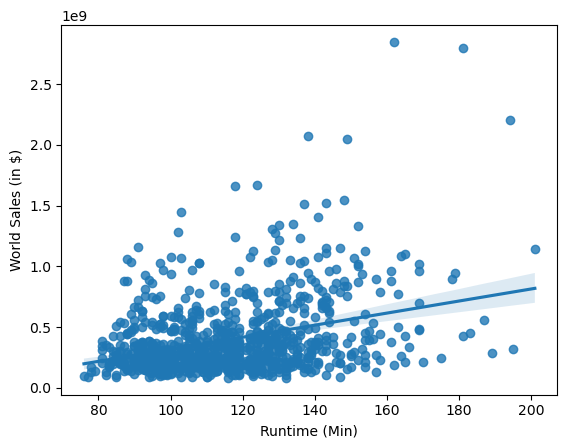

In [ ]:
# Runtime vs. Worldwide Sales
sns.regplot(data=comb,
            x='Runtime (Min)',
            y='World Sales (in $)')

###### Notes: A positive correlation is apparent, where worldwide sales increase as runtime increases.

<Axes: xlabel='Runtime (Min)', ylabel='Average Rating'>

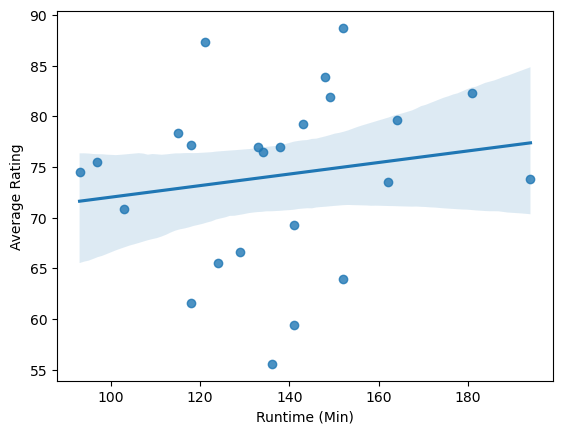

In [ ]:
# Runtime vs. Average Rating
sns.regplot(data=comb,
               x='Runtime (Min)',
               y='Average Rating')

###### Notes: There seems to be no significant relationship between average rating and runtime. However, the data available is incredibly limited, and if a trend does exist, more data is required to reveal it.

<Axes: xlabel='Runtime (Min)', ylabel='Distributor'>

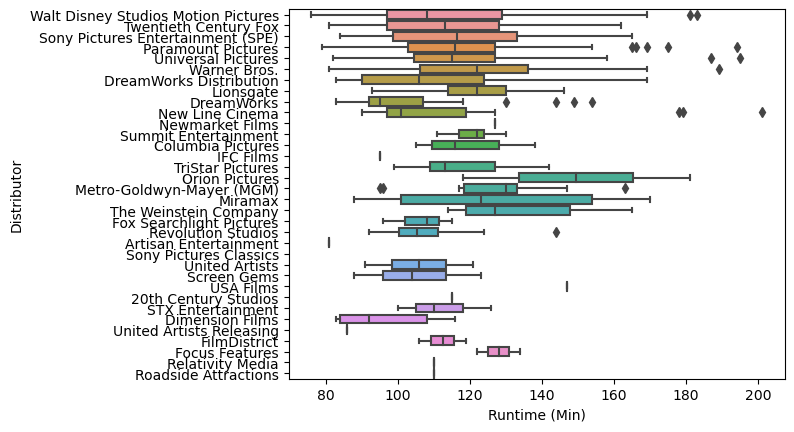

In [ ]:
# Runtime vs. Distributer
sns.boxplot(data=comb,
            y='Distributor',
            x='Runtime (Min)')

###### Notes: The data is too complicated to decicisely state with the current graph whether any significant correlation exists between distributor and runtime. If runtime is relatively well distributed across distributors, then the distributor can be disregarded as a potential confounding variable.

<Axes: xlabel='Runtime (Min)', ylabel='Genre'>

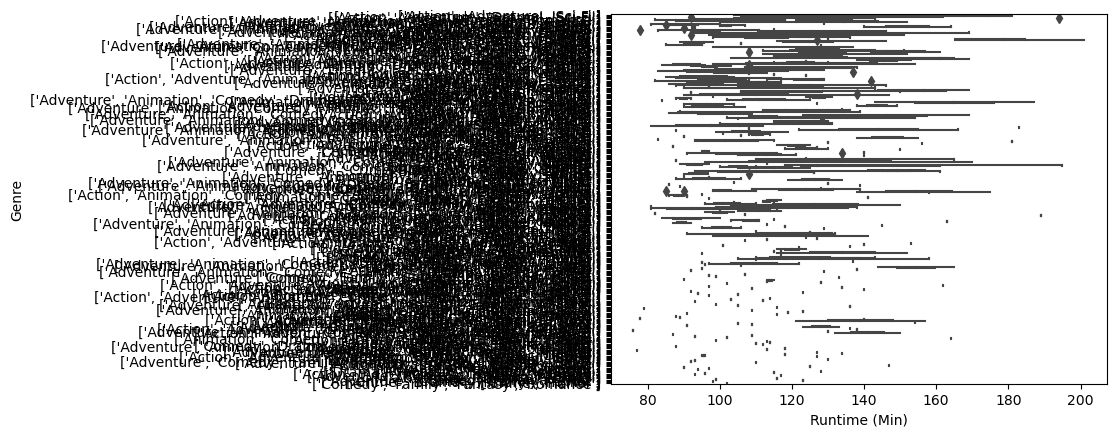

In [ ]:
# Runtime vs. Genre
sns.boxplot(data=comb,
            y='Genre',
            x='Runtime (Min)')

###### Notes: The data must be further processed to produce a readable graph. At the moment, it is hard to say whether any correlation exists between genre and runtime. If runtime is relatively well distributed across genres, then genre can be disregarded as a potential confounding variable.

## Refining the Research Question

The initial research question was as follows: "Are shorter or longer films more popular?" The two variables which are being used to represent the popularity of a film is its sales and ratings. Currently, the dataset on ratings is too incomplete to determine whether any significant correlations exist between runtime and ratings. Thus, further work must be performed to complete the ratings dataset. Once complete, it will be possible to analyze the relationships between runtime and average rating, as well as ratings from different sites. This may reveal that certain sites have a bias towards shorter or longer runtimes.

Contrarily, the dataset on sales is fully complete. The preliminary graphs appear to show a positive correlation between runtime and sales both domestically and internationally, as well as worldwide. However, since these graphs lack statistical annotations (such as the slope, r<sup>2</sup>, and F-value of the regression), it cannot be said with certainty whether these apparent correlations are significant. Thus, later graphs will require these annotations to be added. Additionally, later analysis should compare the regression lines of domestic, international, and worldwide sales to determine whether there is a significant difference between them. This may reveal that the domestic or international audiences have a bias towards shorter and longer runtimes.

Following individual analysis of sales and ratings, I propose a new variable can be added which combines the sales and ratings into a 'popularity' score. In this way, both aspects of films can be taken into account together to determine how runtime affects popularity. This variable may be calculated as follows: 'Popularity' will be the sum of a 'sales' percentage score and a 'ratings' percentage score. The sales percentage score will be the film's world sales divided by the highest world sales value in the dataset, multiplied by 100. The ratings percentage score will the average score across all sites.

The last two preliminary graphs addressed the possibility of the distributor and genre acting as confounding variables. These current graphs are not sufficient to determine whether runtime is evenly distributed across distributor and genre. Regarding the distributor, later graphing will require either a different graphing method or statistical annotations. Regarding genre, the data will need to be further proccessed - perhaps by separating each genre type into a separate instance - in addition to either a different graphing method or addition of statistical annotations. If these later analyses reveal that runtime is evenly distributed across distributor and genre, we can safely disregard these variables as confounding factors and conclude that the patterns observed between runtime and popularity are the effect of runtime alone. However, if this is not the case, further analysis will be required to determine how distributor or genre may be interplaying with runtime to affect popularity.

Taking all of the above into consideration, the research question has been revised into the following: **"Does the length of a film affect its popularity, as assessed by sales and ratings? Do certain audiences and film review websites have a bias towards films of a certain length?"**

## Milestone 4 Task 1: Step Up an "Analysis Pipeline"

### 1. Load Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import re

df1 = pd.read_csv("../data/raw/Highest Holywood Grossing Movies.csv")
df2 = pd.read_csv("../data/processed/Movie Aggregate Rating Data Final.csv")

### 2. Clean Data

In [7]:
df1 = df1.drop(columns=['Unnamed: 0', 'Movie Info', 'Release Date','License'])
df2 = df2.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'])

### 3. Process Data

In [8]:
df1['Hours'] = df1['Movie Runtime'].str.extract('(\d+)\shr\s*\d*\s*m*i*n*', expand=True)
df1['Minutes'] = df1['Movie Runtime'].str.extract('\d+\shr\s*(\d*)\s*m*i*n*', expand=True)
df1['Hours'] = pd.to_numeric(df1['Hours'])
df1['Minutes'] = pd.to_numeric(df1['Minutes'])
df1['Minutes'] = df1['Minutes'].fillna(0)
df1['Runtime (Min)'] = round(((60 * df1['Hours']) + df1['Minutes']),1)
df1 = df1.drop(columns= ['Hours','Minutes','Movie Runtime'])

df2['Imdb'] = df2['Imdb'].str.extract('(\d+\.*\d*)\s*\(*\d*\+*\)*', expand=True)
df2['Letterboxd'] = df2['Letterboxd'].str.extract('(\d+\.*\d*)\s*\(*\d*\+*\)*', expand=True)
df2['Rateyourmusic'] = df2['Rateyourmusic'].str.extract('(\d+\.*\d*)\s*\(*\d*\+*\)*', expand=True)
df2 = df2.apply(pd.to_numeric, errors = 'ignore')
df2['Imdb Standardized'] = (df2['Imdb']/10)*100
df2['Letterboxd Standardized'] = (df2['Letterboxd']/5)*100
df2['Rateyourmusic Standardized'] = (df2['Rateyourmusic']/5)*100
df2 = df2.drop(columns=['Imdb', 'Letterboxd','Rateyourmusic'])
df2['Average Rating'] = round(((df2['Imdb Standardized'] + df2['Letterboxd Standardized'] + df2['Rateyourmusic Standardized'])/3),1)

### 4. Wrangle Data

In [9]:
df3 = pd.merge(
    df1,
    df2,
    how="outer",
    on='Title',
    left_on=None,
    right_on=None,
    left_index=False,
    right_index=False,
    sort=False,
    suffixes=("_x", "_y"),
    copy=True,
    indicator=False,
    validate=None,
)
df3['Worldwide Popularity'] = round(((((df3['World Sales (in $)']/df3['World Sales (in $)'].max())*100)/2) + (df3['Average Rating']/2)),1)
df3 = df3.dropna()

## Milestone 4 Task 2: Method Chaining and Writing Python Programs

In [10]:
def load_and_process(csv1,csv2):
    import pandas as pd
    import numpy as np
    import matplotlib.pylab as plt
    import seaborn as sns
    import re
    
    df1 = (pd.read_csv(csv1)
           .drop(columns=['Unnamed: 0', 'Movie Info', 'Release Date','License']))
    df1 = (
        df1
        .assign(**{'Hours': lambda x: x['Movie Runtime'].str.extract('(\d+)\shr\s*\d*\s*m*i*n*', expand=True)})
        .assign(**{'Minutes': lambda x: x['Movie Runtime'].str.extract('\d+\shr\s*(\d*)\s*m*i*n*', expand=True)})
        .apply(pd.to_numeric, errors = 'ignore')
        .assign(**{'Minutes': lambda x: x['Minutes'].fillna(0)})
        .assign(**{'Runtime (Min)': lambda x: round(((60 * x['Hours']) + x['Minutes']),0)})
        .drop(columns= ['Hours','Minutes','Movie Runtime'])
    )
    df2 = (pd.read_csv(csv2)
           .drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'])
    )
    df2 = (
        df2
        .assign(**{'Imdb': lambda x: x['Imdb'].str.extract('(\d+\.*\d*)\s*\(*\d*\+*\)*', expand=True)})
        .assign(**{'Letterboxd': lambda x: x['Letterboxd'].str.extract('(\d+\.*\d*)\s*\(*\d*\+*\)*', expand=True)})
        .assign(**{'Rateyourmusic': lambda x: df2['Rateyourmusic'].str.extract('(\d+\.*\d*)\s*\(*\d*\+*\)*', expand=True)})
        .apply(pd.to_numeric, errors = 'ignore')
    )
    df2 = (
        df2
        .assign(**{'Imdb Standardized': lambda x: (x['Imdb']/10)*100})
        .assign(**{'Letterboxd Standardized': lambda x: (x['Letterboxd']/5)*100})
        .assign(**{'Rateyourmusic Standardized': lambda x: (x['Rateyourmusic']/5)*100})
        .drop(columns=['Imdb', 'Letterboxd','Rateyourmusic'])
        .assign(**{'Average Rating': lambda x: round(((x['Imdb Standardized'] + x['Letterboxd Standardized'] + x['Rateyourmusic Standardized'])/3),1)})
    )
    df3 = (
        pd.merge(
            df1,
            df2,
            how="outer",
            on='Title')
        .assign(**{'Worldwide Popularity': lambda x: round(((((x['World Sales (in $)']/x['World Sales (in $)'].max())*100)/2) + (x['Average Rating']/2)),1)})
        .dropna()
    )
    return df3

In [11]:
from typing import TYPE_CHECKING
if TYPE_CHECKING:
    from .code import project_functions2 as pf2
else:
    import sys
    sys.path.append("./code")
    import project_functions2 as pf2

df = pf2.load_and_process("../data/raw/Highest Holywood Grossing Movies.csv","../data/processed/Movie Aggregate Rating Data Final.csv")
df

,Title,Distributor,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Runtime (Min),Imdb Standardized,Letterboxd Standardized,Rateyourmusic Standardized,Average Rating,Worldwide Popularity
0,Star Wars: Episode VII - The Force Awakens (2015),Walt Disney Studios Motion Pictures,936662225.0,1.132859e+09,2.069522e+09,"['Action', 'Adventure', 'Sci-Fi']",138.0,78.0,68.2,60.6,68.9,70.8
1,Avengers: Endgame (2019),Walt Disney Studios Motion Pictures,858373000.0,1.939128e+09,2.797501e+09,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",181.0,84.0,78.4,65.0,75.8,87.0
2,Avatar (2009),Twentieth Century Fox,760507625.0,2.086739e+09,2.847246e+09,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",162.0,79.0,70.6,54.2,67.9,84.0
3,Black Panther (2018),Walt Disney Studios Motion Pictures,700426566.0,6.471714e+08,1.347598e+09,"['Action', 'Adventure', 'Sci-Fi']",134.0,73.0,74.8,59.4,69.1,58.2
4,Avengers: Infinity War (2018),Walt Disney Studios Motion Pictures,678815482.0,1.369544e+09,2.048360e+09,"['Action', 'Adventure', 'Sci-Fi']",149.0,84.0,80.0,68.6,77.5,74.7
...,...,...,...,...,...,...,...,...,...,...,...,...
445,Wanted (2008),Universal Pictures,134508551.0,2.079545e+08,3.424631e+08,"['Action', 'Crime', 'Thriller']",110.0,67.0,59.0,47.4,57.8,34.9
446,Identity Thief (2013),Universal Pictures,134506920.0,3.945809e+07,1.739650e+08,"['Comedy', 'Crime', 'Drama']",111.0,57.0,48.8,41.4,49.1,27.6
447,Superman (1978),Warner Bros.,134451603.0,1.660000e+08,3.004516e+08,"['Action', 'Adventure', 'Sci-Fi']",143.0,74.0,72.6,62.6,69.7,40.1
448,The Rock (1996),Walt Disney Studios Motion Pictures,134069511.0,2.009931e+08,3.350626e+08,"['Action', 'Adventure', 'Thriller']",136.0,74.0,69.8,59.2,67.7,39.7


## Milestone 4 Task 3: Conduct Analysis to Answer Research Question(s)

<Axes: xlabel='Runtime (Min)', ylabel='Domestic Sales (in $)'>

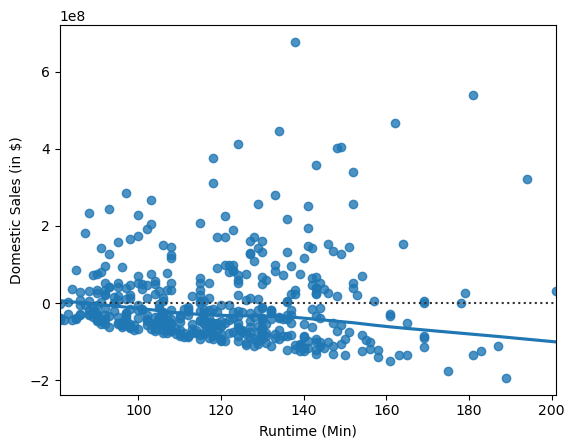

In [12]:
sns.residplot(data=df, x="Runtime (Min)", y="Domestic Sales (in $)", lowess=True)

Before performing a linear regression between movie runtime and domestic sales, it was necessary to check whether the data fit the assumptions of the linear regression. Therefore, a residuals plot was graphed to check whether the dataplots were evenly distributed. In the graph above, this does not appear so. Heteroscedasticity is apparent.

<Axes: xlabel='Runtime (Min)', ylabel='Domestic Sales (Log)'>

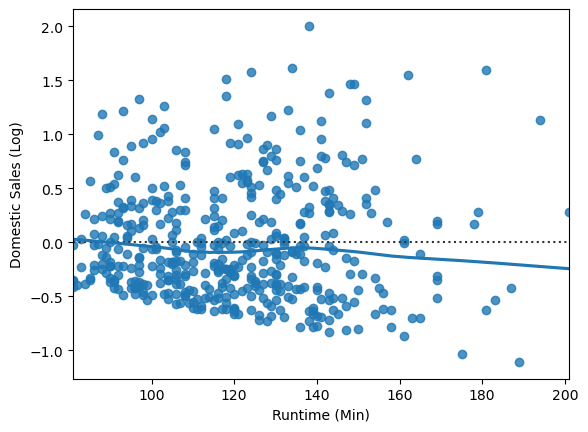

In [13]:
df["Domestic Sales (Log)"] = np.log2(df["Domestic Sales (in $)"])
sns.residplot(data=df, x="Runtime (Min)", y="Domestic Sales (Log)", lowess=True)

In an attempt to resolve the apparent heteroscedasticity, the independent variable - domestic sales - was log-transformed. Regraphing the residuals with the log-transformed domestic sales data appears to have solved most of the issue. Still, the datapoints are not perfectly randomly distributed; this must be considered in the final analysis.

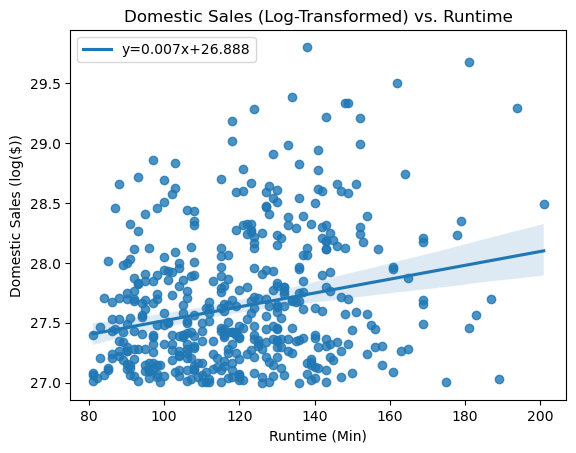

R2 value: 0.2677657556436393
p-value: 7.924004451468783e-09
Standard Error: 0.0011212149935241962


In [14]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Runtime (Min)'],df['Domestic Sales (Log)'])
ax = sns.regplot(data=df,
            x='Runtime (Min)',
            y='Domestic Sales (Log)',
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)},
            robust=True,
           )
ax.legend()
ax.set(title = 'Domestic Sales (Log-Transformed) vs. Runtime',
       ylabel = 'Domestic Sales (log($))',
      )
plt.show()
print(f"R2 value: {r_value}\np-value: {p_value}\nStandard Error: {std_err}")

Since log-transforming the domestic sales produced a relatively well-distributed residual plot, it is reasonable to move forward with the linear regression plot. The resulting graph above shows that there is a positive trend in the data. The statistics R2, p-value, and standard error must be taken into acount in the final analysis to assess whether this trend is statistically significant.

<Axes: xlabel='Runtime (Min)', ylabel='International Sales (in $)'>

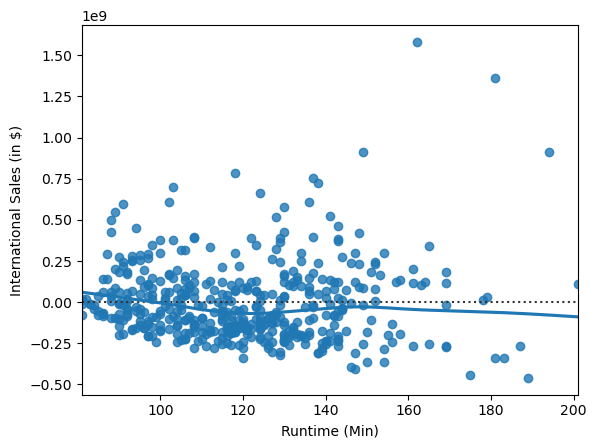

In [15]:
sns.residplot(data=df, x="Runtime (Min)", y="International Sales (in $)", lowess=True)

For all the following graphs, a similar procedure was performed as for the first domestic sales vs. runtime. In the case of international sales, although the datapoints are more evenly distributed, it still seems reasonable to see whether a log-transformation will stabilize the pattern.

<Axes: xlabel='Runtime (Min)', ylabel='International Sales (Log)'>

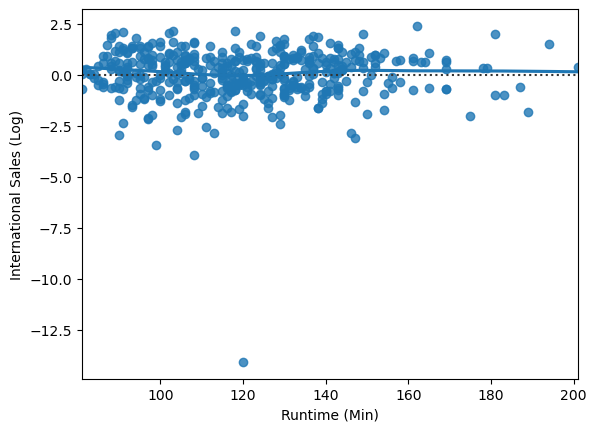

In [16]:
df["International Sales (Log)"] = np.log2(df["International Sales (in $)"])
sns.residplot(data=df, x="Runtime (Min)", y="International Sales (Log)", lowess=True)

Log-transforming the data appears to have been largely successful. However, there is a clear outlier which is making it difficult to assess.

<Axes: xlabel='Runtime (Min)', ylabel='International Sales (Log)'>

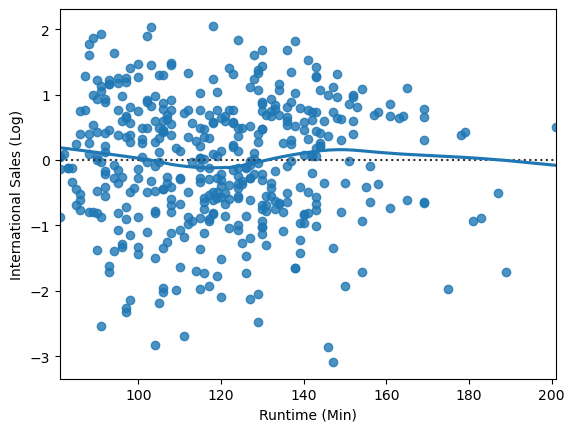

In [17]:
q_low = df['International Sales (Log)'].quantile(0.01)
q_hi  = df['International Sales (Log)'].quantile(0.99)
df_filtered = df[(df['International Sales (Log)'] < q_hi) & (df['International Sales (Log)'] > q_low)]
sns.residplot(data=df_filtered, x="Runtime (Min)", y="International Sales (Log)", lowess=True, robust=True)

The data for international sales was filtered to remove outliers by removing datapoints in the lower and higher quantiles. This was effective and allows the viewer to clearly see that the data is well-enough evenly distributed.

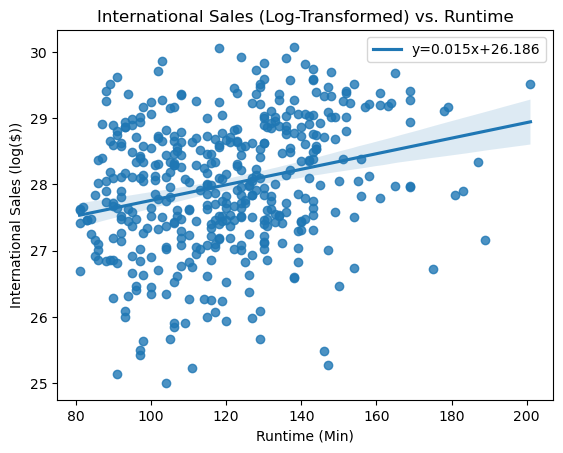

R2 value: 0.2638137385981089
p-value: 1.3333748070659205e-08
Standard Error: 0.002546462717691686


In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Runtime (Min)'],df['International Sales (Log)'])
ax = sns.regplot(data=df_filtered,
            x='Runtime (Min)',
            y='International Sales (Log)',
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)}
           )
ax.legend()
ax.set(title = 'International Sales (Log-Transformed) vs. Runtime',
       ylabel = 'International Sales (log($))',
      )
plt.show()
print(f"R2 value: {r_value}\np-value: {p_value}\nStandard Error: {std_err}")

Once again, a positive trend is apparent, although statistical values must be considered.

<Axes: xlabel='Runtime (Min)', ylabel='World Sales (in $)'>

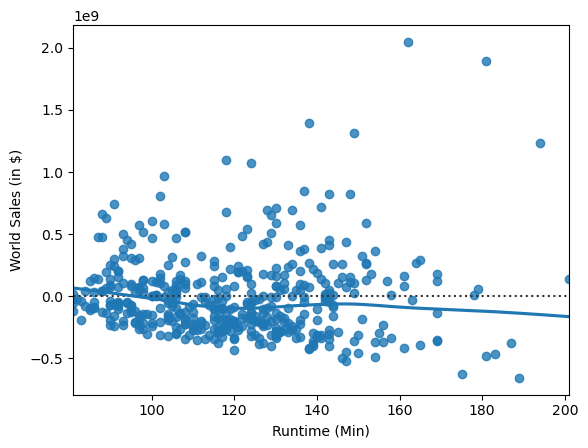

In [19]:
sns.residplot(data=df, x="Runtime (Min)", y="World Sales (in $)", lowess=True)

<Axes: xlabel='Runtime (Min)', ylabel='World Sales (Log)'>

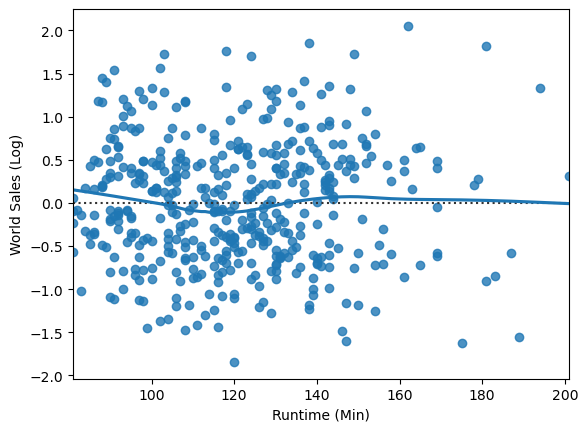

In [20]:
df["World Sales (Log)"] = np.log2(df["World Sales (in $)"])
sns.residplot(data=df, x="Runtime (Min)", y="World Sales (Log)", lowess=True)

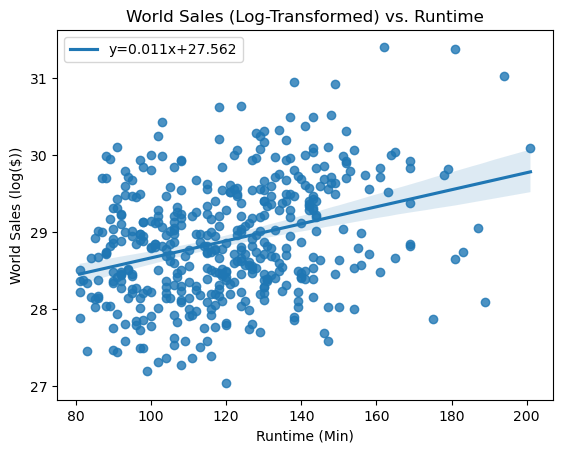

R2 value: 0.3290542270776589
p-value: 7.993250182896928e-13
Standard Error: 0.0014996520438621548


In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Runtime (Min)'],df['World Sales (Log)'])
ax = sns.regplot(data=df,
            x='Runtime (Min)',
            y='World Sales (Log)',
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)}
           )
ax.legend()
ax.set(title = 'World Sales (Log-Transformed) vs. Runtime',
       ylabel = 'World Sales (log($))',
      )
plt.show()
print(f"R2 value: {r_value}\np-value: {p_value}\nStandard Error: {std_err}")

Once again, a positive trend is apparent, although statistical values must be considered.

<Axes: xlabel='Runtime (Min)', ylabel='Average Rating'>

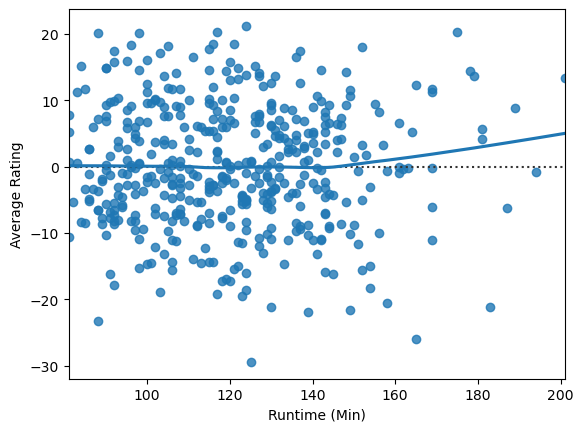

In [22]:
sns.residplot(data=df, x="Runtime (Min)", y="Average Rating", lowess=True)

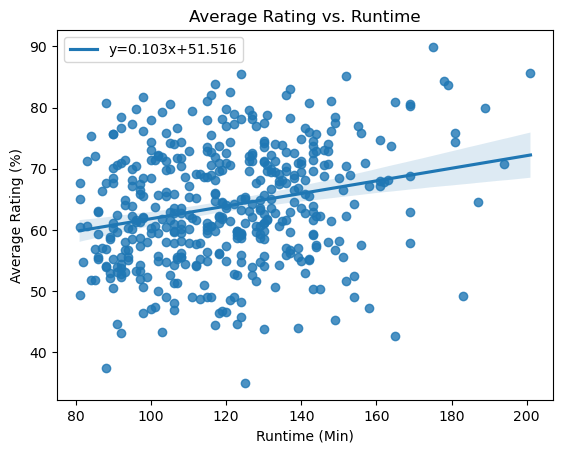

R2 value: 0.24475999555624292
p-value: 1.4572085550984227e-07
Standard Error: 0.01929791965667816


In [23]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Runtime (Min)'],df['Average Rating'])
ax = sns.regplot(data=df,
            x='Runtime (Min)',
            y='Average Rating',
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)}
           )
ax.set(title = 'Average Rating vs. Runtime',
       ylabel = 'Average Rating (%)'
      )
ax.legend()
plt.show()
print(f"R2 value: {r_value}\np-value: {p_value}\nStandard Error: {std_err}")

Average rating also shows a positive trend with runtime.

<Axes: xlabel='Runtime (Min)', ylabel='Worldwide Popularity'>

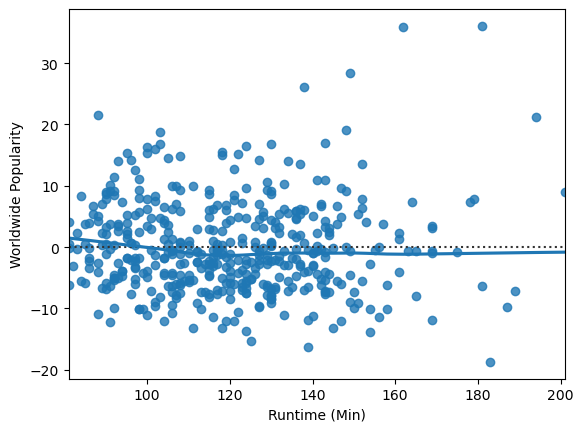

In [24]:
sns.residplot(data=df, x="Runtime (Min)", y="Worldwide Popularity", lowess=True)

Here, the datapoints are well-distributed, but there are some minor outliers.

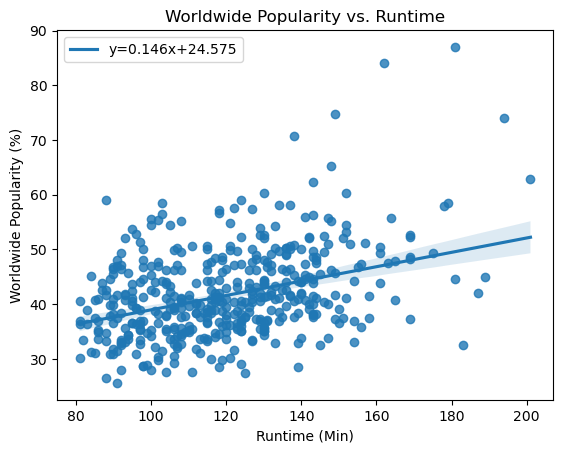

R2 value: 0.39863005735679036
p-value: 1.3668051525764419e-18
Standard Error: 0.015826149245231118


In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Runtime (Min)'],df['Worldwide Popularity'])
ax = sns.regplot(data=df,
            x='Runtime (Min)',
            y='Worldwide Popularity',
            line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)},
            robust=True
           )
ax.legend()
ax.set(title = 'Worldwide Popularity vs. Runtime',
       ylabel = 'Worldwide Popularity (%)',
      )
plt.show()
print(f"R2 value: {r_value}\np-value: {p_value}\nStandard Error: {std_err}")

Instead of going as far as removing the lower and higher quartiles, the 'robust' setting was set to 'True,' which ensures that the trendline is less strongly affected by outliers. Again, a positive trend is apparent worldwide popularity and runtime.

Overall, all five variables - domestic sales, international sales, world sales, average rating, and worldwide popularity - show a positive trend in correlation with runtime. Thus, movies with longer runtimes appear to do better in terms of sales, ratings, and popularity. The slope for the trendline in the worldwide popularity and runtime graph reveals that popularity increases by around 0.15 for every minute runtime is increased. The p-value and R-sqaured values for this equation are low enough to consider this trend apparent. Therefore, the results of this analysis find that longer movies are more popular than shorter movies.

## Milestone 5

### Creating Columns for Genres

In [26]:
genres = set()
for index, row in df.iterrows():
    x = row['Genre']
    x = x.replace('[','')
    x = x.replace(']','')
    x = x.replace('\'','')
    x = x.replace(',','')
    descriptors = x.split()
    for i in descriptors:
        if i not in genres:
            genres.add(i)
for i in genres:
    print(i)
    df[i] = False
genres_list=list(genres)

Family
Action
Fantasy
Western
Crime
Comedy
Biography
Sport
Adventure
War
Romance
Animation
Mystery
Sci-Fi
Drama
Musical
Horror
Thriller
Music
History


In [27]:
def genresetter(genre):
    for index, row in df.iterrows():
        try:
            row['Genre'].index(genre)
        except ValueError:
            df.at[index, genre]=False
        else:
            df.at[index, genre]=True

In [28]:
for i in genres_list:
    genresetter(i)

In [35]:
for i in genres_list:
    df[df[i]==True].to_csv(f"../data/processed/{i}.csv")

In [84]:
#Saving processed dataframe as csv.
df.to_csv("../data/processed/kyla_processed_data.csv",index=False)

In [36]:
df_genres = df.assign(Genre=df['Genre'].str.split(' ')).explode('Genre')

In [38]:
df_genres.to_csv('../data/processed/kyla_genres.csv')